# How to Quantitatively Analyse an Image 

# (Matthew Dimmock, Monash University)

The aim of this IPython Notebook is to introduce you to how real quantitative analysis of an image is performed.  In order to do this, we will complete the following analysis procedure:

1.  Load an image.
1.  Select an RoI.
1.  Histogram the intensities.
1.  Fit the histogram.
1.  Extract the parameters that define the fit function.

# Loading and Presenting Image File Data

We are going to start by loading a raw image file that is representative of a data set that may have been acquired during an imaging experiment.  To do this, we will use the Scipy (http://www.scipy.org/) library.

In general, image data can be stored in either raster or vector graphics formats.  Vector graphics scale with the resolution of the device on which they are viewed, whereas the appearance of raster graphics is resolution dependent and cannot scale arbitrarily.  Vector graphics are typically used for graphical design applications whilst raster graphics are used for photographic images.  

In this demonstration we will be concerned with raster graphics which are effectively a dot matrix of data.  As medical images may be optical or non-optical (e.g. X-ray) we will also discuss the coversion between colour and grayscale.  At each point in the matrix of a colour (RGB) raster image a red (R), green (G) and blue (B) value is stored.  

The raster image we will load is of Sally Ride (http://en.wikipedia.org/wiki/Sally_Ride) the first US female in space.  We will use this image as our phantom (test data).

In [1]:
# Import required libraries.
# Get the Scipy ndimage library.
from scipy import ndimage

# Specify the path to the image (PNG) file.
sallyPath = "./Sally.png" 

# Load the image file into memory.
sallyPNG = ndimage.imread(sallyPath)

Now we have loaded the two data sets, we can investigate their properties.

In [4]:
# Check the shape of the image object
print("The shape of the external file (PNG) structure is %d x %d x %d." \
      %(sallyPNG.shape[0], sallyPNG.shape[1], sallyPNG.shape[2]))
print("The maximum pixel intensity is %d." %(sallyPNG.max()))
print("The data type is %s." %(sallyPNG.dtype))


The shape of the external file (PNG) structure is 512 x 512 x 3.
The maximum pixel intensity is 255.
The data type is uint8.


We can see that the PNG file has three values at each location in the 512 x 512 matrix, corresponding to the intensity of R, G and B.  As a side note, an RGB image may have three or four columns.  The fourth column would correspond to an $\alpha$-value (A) which describes the opacity of the image and is utilised for overlaying multiple images.  We will not worry about $\alpha$-values in this demonstration.  A PNG would typically be 32-bit (four bytes) per pixel for RGBA, with 8-bit integer precision per channel (R, G, B and A), per pixel.  For grayscale, the PNG might have 8-bit integer precision per pixel with a byte-depth of only one.      

Now we will plot the image using the `imshow` function in `Matplotlib`.  As we are plotting data, we must also be concerned with presentation.  Matplotlib does not have a [layout-engine](../../gloss.html#layout-engine) and so certain formatting tasks must be undertaken by the user.  In the following example, the first section of code is present to overwrite the default `rcParams` dictionary with those suitable for the IPython Notebook.

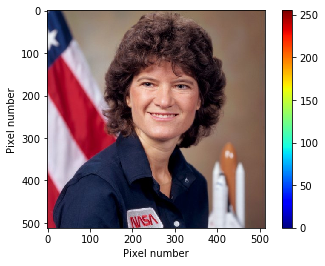

In [5]:
# Specify that we want to show the plots in the notebook.
%matplotlib inline

# Get the Matplotlib plotting libraries.
import pylab as plt

# Plot the PNG in the jet colourmap.
plt.figure()
plt.imshow(sallyPNG, interpolation = 'nearest', origin='upper', cmap="jet")
plt.xlabel("Pixel number")
plt.ylabel("Pixel number")
plt.clim([0,255])
plt.colorbar()

plt.show()

In the plot above all three colour components (R, G and B) are shown as is typical for a standard display.  We have specified the "jet" colour map explicitly in this example, although "jet" is the defaults colour map in Matplotlib.  

The image we have imported has three color channels; we can combine these into a single grayscale channel so that we have a monochrome image to work with.  The data that we would acquire from most typical experiments is expressed in terms of intensities (grayscale), not RGB triplets. 

As a side note, it is useful to understand that grayscale images can be stored as integer (e.g. 8-bit PNG) or floating point (e.g. 32-bit TIFF - complicated container not discussed here).  Scipy and Matplotlib both call the Python Image Library (PIL) for image reading and writing.  The PIL can only read up to 16-bit TIFFs.         

In [6]:
# A more elegant way to separate the image into its RGB components is to use the transpose of the array of input data.
redSallyT, greenSallyT, blueSallyT =  ndimage.imread(sallyPath).T

# Now apply step to of the conversion from sRGB to linear grayscale.
graySally = (0.299 * redSallyT) + (0.587 * greenSallyT) + (0.114 * blueSallyT)

# We have to apply a second transpose as the initial transpose swapped the X and Y axes as well as the Z axis.
graySally = graySally.T.astype("uint8")


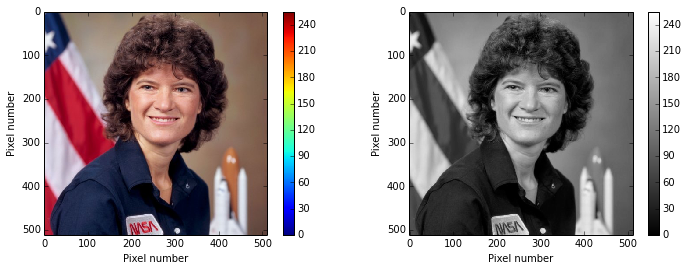

In [5]:
# Plot the PNG in the jet colourmap.
# Can't keep the same figure size for multi-sub-plot so need to specify something sensible.
plt.figure(figsize = (12.0, 4.0))    
plt.subplot(1,2,1)
plt.imshow(sallyPNG, interpolation = 'nearest', origin='upper', cmap="jet")
plt.xlabel("Pixel number")
plt.ylabel("Pixel number")
plt.clim([0,255])
plt.colorbar()

# Plot the grayscale image in grayscale.
plt.subplot(1,2,2)
plt.imshow(graySally, interpolation = 'nearest', origin='upper', cmap="gray")
plt.xlabel("Pixel number")
plt.ylabel("Pixel number")
plt.clim([0,255])
plt.colorbar()

plt.show()

### Challenges

We have However, we have only populated one of the 3 `subplots`.  What we really need is a function that incorporates the syntax we have just used but that populates the 3 `subplots` using a `for` loop.

1.  Write a function called `plotNby1Subplot` that takes a list of `N` tuples of images with their corresponding colour-maps and plots them in a `1xN` row of subplots.  Demonstrate that it correctly plots the tuples:

    ```
    (sallyPNG, "jet"),
    (graySally, "jet"),
    (graySally, "gray").
    ```

1.  Use the same `plotNby1Subplot` function and the correct colour-maps to display the R, G and B components of `sallyPNG`.

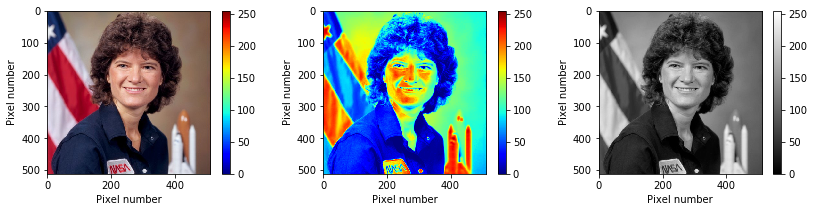

In [7]:
# SOLUTION TO CHALLENGE 1
def plotNby1Subplot(icts, figSize = (12.0, 4.0)):

    # Get handles for the figure and the subplots.
    fig = plt.figure(figsize = figSize)
    
    for index, ict in enumerate(icts):
  
        # Plot the image.
        plt.subplot(1, len(icts), index + 1)
        im2Plot = icts[index][0]
        plt.imshow(im2Plot, interpolation = 'nearest', origin = 'upper', cmap = icts[index][1])
        plt.xlabel("Pixel number")
        plt.ylabel("Pixel number")
        plt.clim([0,255])
        plt.colorbar()
        
    
# Define the tuple data.
imageColbarTupList = [(sallyPNG, "jet"),
                      (graySally, "jet"),
                      (graySally, "gray")]

# Plot the images
plotNby1Subplot(imageColbarTupList, figSize = (14.0, 3.0))

plt.show()

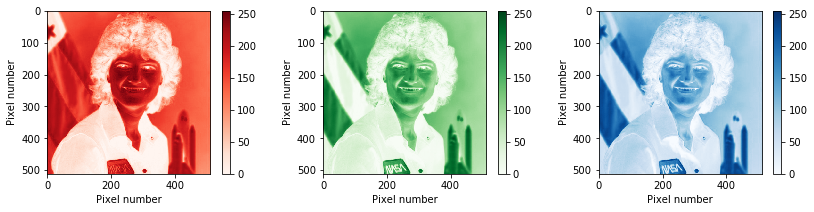

In [8]:
# SOLUTION TO CHALLENGE 2

# We can access the R component of the array.
redSally = sallyPNG[:,:,0]

# We can also access the G and B components:
greenSally = sallyPNG[:,:,1]
blueSally = sallyPNG[:,:,2]

imageColbarTupList = [(redSally, "Reds"),
                      (greenSally, "Greens"),
                      (blueSally, "Blues")]

# Plot the images
plotNby1Subplot(imageColbarTupList, figSize = (14.0, 3.0))

plt.show()

# Image Data Manipulation

Up to now all that we have done is load an image file and present the data to explain how it is stored in different image files.  RGB data is not usually the most useful format for quantitative analysis in medical imaging.  What we need are the grayscale intensities, so that we have a single number at each point in the 512 x 512 matrix.  

The rigorous way to convert RGB to grayscale follows a multi-step process (http://en.wikipedia.org/wiki/SRGB):

1.  Map the PNG sRGB values onto the linear sRGB scale using the reverse gamma transformation.
1.  Convert the linear sRGB values to linear grayscale values.
1.  Apply the forward sRGB gamma transformation.

We are not going to worry about the gamma correction and will just apply Step 2 which is a good enough approximation.

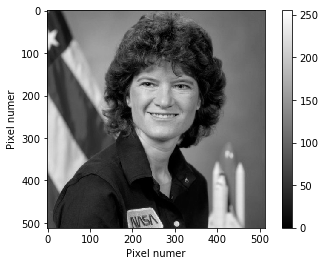

In [9]:
def plotSingleFigImshow(im2Plot):
    # Plot grayscale image.
    plt.imshow(im2Plot, interpolation = 'nearest', origin='upper', cmap='gray')
    plt.xlabel("Pixel numer")
    plt.ylabel("Pixel numer")
    plt.clim([0,255])  
    plt.colorbar()
    
# Plot the image.
plotSingleFigImshow(graySally)

plt.show()

Now we have the grayscale (intensity) distribution of the image we are ready to analyse the data.  

In image processing, we often wish to apply a point operation to the data set.  In this example we will set a window with a level of 50 and a width of 60 ($\pm$30).  All pixels that lie outside of the window (20 < I < 80) will be set to zero.  We could do this with [nested-loops](../../gloss.html#nested-loops), however, this is cumbersome and messy.  A neater way is to use a [boolean](../../gloss.html#boolean) [mask](../../gloss.html#mask):

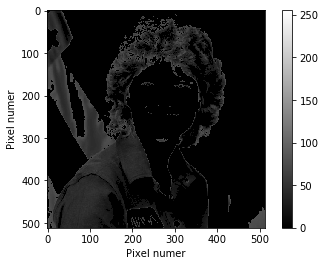

In [10]:
# Generate a mask by simple thresholding.
boolMask = (graySally > 80) | (graySally < 20)

# In the mask, all pixels with intensity >200 OR <100 will be set to True.
# Now set these pixels to zero.
graySally[boolMask] = 0

# Plot the image.
plotSingleFigImshow(graySally)

plt.show()

We can see that all regions of the data that lie outside the window now appear black in the image.

If we now decide that we want to apply a different threshold we will run into a problem.  We will demonstrate this by applying a window with a level of 120 and a width of 40 ($\pm$20). 

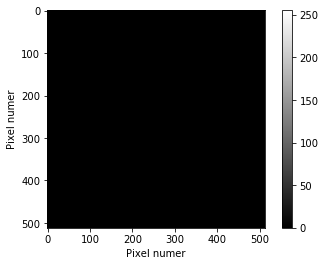

In [11]:
# Generate a mask by simple thresholding.
boolMask = (graySally > 140) | (graySally < 100)

# In the mask, all pixels with intensity >200 OR <100 will be set to True.
# Now set these pixels to zero.
graySally[boolMask] = 0

# Plot the image.
plotSingleFigImshow(graySally)

plt.show()

We can see that the image is black.  That is because we are applying a second threshold to the same  [instance](../../gloss.html#instance) of the data that we applied the initial window to.  Whenever we want to manipulate data we should first make a copy so that we maintain the integrity of the initial instance.  We can do this by using the `copy` function in the `copy` library:

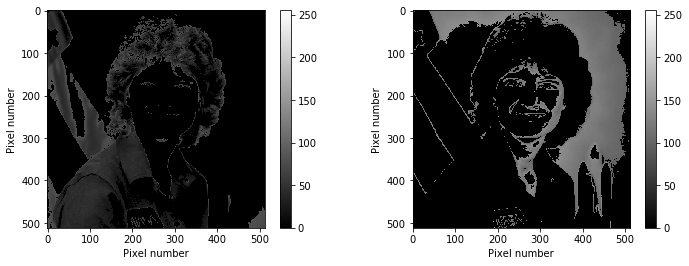

In [12]:
# Import the copy library.
import copy as cp

# We need to go back and regenerate graySally.
graySally = (0.299 * redSally) + (0.587 * greenSally) + (0.114 * blueSally)

# And get it back in the right data type
graySally = graySally.astype("uint8")

# We must make a copy of the original image otherwise we will not be able to compare to the original.
copy1Sally = graySally.copy()
copy2Sally = graySally.copy()

# Generate a mask by simple thresholding.
boolMask = (graySally > 80) | (graySally < 20)

# In the mask, all pixels with intensity >80 OR <20 will be set to True.
# Now set these pixels to zero.
copy1Sally[boolMask] = 0

# Generate a mask by simple thresholding.
boolMask = (graySally > 140) | (graySally < 100)

# In the mask, all pixels with intensity >140 OR <100 will be set to True.
# Now set these pixels to zero.
copy2Sally[boolMask] = 0

# Plot the images
# If you managed to write the function in the challenge, use this to plot the figures.  Otherwise, revert to the non-ideal method.
try:

    # Define the tuple data.
    imageColbarTupList = [(copy1Sally, "gray"),
                          (copy2Sally, "gray")]

    plotNby1Subplot(imageColbarTupList)

except:
    print("Plotting function does not exist.  Using non-ideal method")
    
    plt.figure(figsize = (4.0, 2.0)) 
    
    # Plot the grayscale image copy1Sally.   
    plt.subplot(1,3,1)
    plt.imshow(sallyPNG, interpolation = 'nearest', origin='upper', cmap="jet")
    plt.xlabel("Pixel number")
    plt.ylabel("Pixel number")
    plt.clim([0,255])
    plt.colorbar()

    # Plot the grayscale image copy2Sally.
    plt.subplot(1,3,2)
    plt.imshow(graySally, interpolation = 'nearest', origin='upper', cmap="jet")
    plt.xlabel("Pixel number")
    plt.ylabel("Pixel number")
    plt.clim([0,255])
    plt.colorbar()

plt.show()


We will move on show how to select a region of interest (RoI).  The first step is to obtain a [handle](../../gloss.html#handle) for the subset of the data that lies within the RoI so that we can then apply a more detailed analysis.

The image data we have used thus far is an [array](../../gloss.html#array) with dimensions 512 x 512.  When working through the stages of an analysis routine, such as the application of an RoI, it is often usefule to start with a much smaller dummy data set; when small arrays are used the contents of the array can be printed to screen for debugging.  We will start with an array that is 5 x 3 and gradually build a [function](../../gloss.html#function) that can then be used on the actual data set.  



In [13]:
# Load the Path library.
from matplotlib.path import Path

# Define the vertices of the polygon that will outline the RoI.
squarePath = Path([[0,0], [0,2], [2,2], [2,0]])

# Create a list of positions to test.
xyPosList = [[0,1], [1, 2], [2, 2], [2, 3]]

# Get a boolean list of the array positions that lie inside the RoI.
bools = squarePath.contains_points(xyPosList)

for i, xy in enumerate(xyPosList):
    if bools[i] == True:
        print("Position %d,%d is inside RoI" %(xy[0], xy[1]))
    else:
        print("Position %d,%d is outside RoI" %(xy[0], xy[1]))


Position 0,1 is outside RoI
Position 1,2 is inside RoI
Position 2,2 is outside RoI
Position 2,3 is outside RoI


From the example above we can see that we have specified a [list](../../gloss.html#list) of coordinates that we want to test.  This is clearly not practical for a larger [array](../../gloss.html#array) such as our image.  We could construct a list using [nested-loops](../../gloss.html#nested-loops), however, this does not demonstrate any new functionality to you.  Instead, we are going to demonstrate how to `reshape` an [array](../../gloss.html#array) and `zip` components together.  

In [42]:
import numpy as np

# Define a meshgrid.
dim1 = 2
dim2 = 3
grid = np.mgrid[0:dim1:1, 0:dim2:1]
    
# Perform a reduction of the x-meshgrid into a 1D array.
xs = grid[0].reshape(dim1 * dim2)
    
# Perform a reduction of the y-meshgrid into a 1D array.
ys = grid[1].reshape(dim1 * dim2)

# Zip the two 1D arrays into a list of x and y position coordinates.
xyPosArray = np.asarray(list(zip(xs, ys)))

print(xyPosArray)

[[0 0]
 [0 1]
 [0 2]
 [1 0]
 [1 1]
 [1 2]]


### Challenges

We have introduced clean and efficient ways of specifying an RoI and defining a `meshgrid` of coordinates to test whether or not lie within the RoI 

1.  Write a function called `getRoIIndices` that tests all of the pixels in a dummy $5 \times 4$ array as to whether or not they lie within an RoI.  If the pixel locations are outside the RoI, the values in the array at these locations should be set to zero.  The vertices of the RoI you should define are:
    ```
    [-1,-1], 
    [-1,2], 
    [2,2], 
    [2,-1].
    ```
    
1.  Plot the result of your RoI selection using the `plotSingleFigImshow` function.


In completing the challenge, there is a simple method for enabling those pixels outside the RoI to be set to zero.  This strategy is to invert the [True](../../gloss.html#True) and [False](../../gloss.html#False) [elements](../../gloss.html#elements) in the `bools` [variable](../../gloss.html#variable) using `bools = ~bools` and then apply the [boolean](../../gloss.html#boolean) [mask](../../gloss.html#mask): to the original [array](../../gloss.html#array).

The shape of the bools array is  (20,) ...
The shape of the data array is  (5, 4) ...
The shape of the bools array is  (5, 4) ...
The indices of the pixels that lie within the RoI are:

[0 0]
[0 1]
[0 2]
[1 0]
[1 1]
[1 2]
[2 0]
[2 1]
[2 2]
...


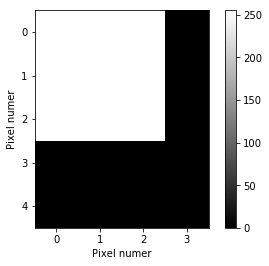

In [43]:
# SOLUTION TO CHALLENGES 1 AND 2

# Load the Numpy library.
import numpy as np

# Load the Path library.
from matplotlib.path import Path

# Define the function for applying an RoI to a Numpy array.
def getRoIIndices(dataArray, polyPath):
    
    # Make a copy of the array.
    modDataArray = dataArray.copy()

    # Check that the input data is a Numpy array.
    assert type(dataArray) == np.ndarray
    
    # Specify the start index of the array in the x-direction.
    xStart = 0
    
    # Specify the start index of the array in the y-direction.
    yStart = 0
    
    # Specify the end index of the array in the x-direction.
    xStop = dataArray.shape[0]
    
    # Specify the end index of the array in the y-direction.
    yStop = dataArray.shape[1]
    
    # Specify the index step length.
    step = 1

    # Define a meshgrid that indexes all of the pixels in the 512 x 512 image.
    grid = np.mgrid[xStart:xStop:step, yStart:yStop:step]
    
    # Perform a reduction of the x-meshgrid into a 1D array.
    xs = grid[0].reshape(xStop * yStop)
    
    # Perform a reduction of the y-meshgrid into a 1D array.
    ys = grid[1].reshape(xStop * yStop)
    
    # Zip the two 1D arrays into a list of x and y position coordinates.
    xyPosArray = np.asarray(list(zip(xs, ys)))

    # Get a boolean list of the array positions that lie inside the RoI.
    bools = polyPath.contains_points(xyPosArray)
    
    # Get the indices of the points inside the RoI.
    xyPosInRoI = xyPosArray[bools] 
    
    
    # Reshape the bools array so that is matches back to the dimensions of the input image.
    print("The shape of the bools array is ", np.shape(bools), "...")
    print("The shape of the data array is ", np.shape(modDataArray), "...")
    rows = dataArray.shape[0]
    cols = dataArray.shape[1]
    bools = bools.reshape(rows, cols)
    print("The shape of the bools array is ", bools.shape, "...")
    
    # Get the data in the RoI.
    dataInRoI = modDataArray[bools]
    
    # Swap the Tures and Falses around.
    bools = ~bools
    
    # Set the pixels outshide of the RoI to zero.
    modDataArray[bools] = 0
    
    return xyPosInRoI, modDataArray, dataInRoI 

# Define the test data array.
testArray = np.ones([5,4]) * 255

# Define the vertices of the polygon that will outline the RoI.
#squarePath = Path([[-1,-1], [-1,2], [2,2], [2,-1]])
squarePath = Path([[-0.1, -0.1], [-0.1, 2.1], [2.1, 2.1], [2.1, -0.1]])
    
# Get the indices of the points inside the RoI.
xyPosInRoI, modArray, dataInRoI = getRoIIndices(testArray, squarePath)

# Plot the image with threshold 20 < I < 80.
plotSingleFigImshow(modArray)



print("The indices of the pixels that lie within the RoI are:\n",)
for i in xyPosInRoI:
    print(i)
print("..." )

plt.show()


Now we are ready to run the RoI selection function on the image that we want to process.  We will aim to primarily select the pixels that contain the background at the top of the image (chosen arbitrarily) as these should give us a distribution of intensities that are correlated in some way that we can then fit.

The shape of the bools array is  (262144,) ...
The shape of the data array is  (512, 512) ...
The shape of the bools array is  (512, 512) ...
There are 4700 intensities in the list ...



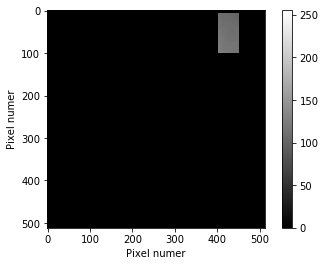

In [45]:
# Define the vertices of the polygon that will outlint the RoI.
squarePath = Path([[5, 400], [5, 450], [100, 450], [100, 400]])

# If you managed to write the function in the challenge, it will be used.  Otherwise, use a random number generator to make some data. 
try:
    
    # Get the indices of the points inside the RoI.
    xyPosInRoI, maskSally, intensitiesInRoI = getRoIIndices(graySally, squarePath)

    # Plot the image mask.
    plotSingleFigImshow(maskSally)

except:
    import random as rn
    mu = 103.0
    sigma = 4.3
    intensitiesInRoI = [rn.gauss(mu, sigma) for i in np.arange(2000)]
    
print("There are %i intensities in the list ...\n" %(len(intensitiesInRoI)))

plt.show()

# Fitting the Data

We can now proceed to analyse the data.  The first step is to interrogate the intensity distribution in order to determine how to proceed.  We will start by simply histogramming the data to gain an understanding of the behaviour of the distribution.

The shape of the histogram is  (2,) ...

The dims of the histogram are  (59,) (60,) ...



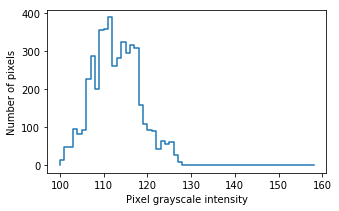

In [46]:
# Histogram the intensity distribution.
histo = np.histogram(intensitiesInRoI, bins = np.arange(60) + 100)
print("The shape of the histogram is ", np.shape(histo), "...\n")
print("The dims of the histogram are ", np.shape(histo[0]), np.shape(histo[1]), "...\n")

# Plot the Histogram.
plt.figure( figsize=(5.0, 3.0))
plt.step(histo[1][:-1], histo[0][:])
plt.xlabel("Pixel grayscale intensity")
plt.ylabel("Number of pixels")    
plt.show()

We can see from the shape of the [histogram](../../gloss.html#histogram) that to first order it is a Gaussian.  In order to quantify the distribution, we need to be able to fit the [histogram](../../gloss.html#histogram) with a Gaussian function.  We perform the fir by defining the function and then minimising its free parameters with respect to the [histogram](../../gloss.html#histogram).

Before we perform the fit, we will just revisit some of the basic principles of how to define [functions](../../gloss.html#functions).

Pyhton offers two different means for defining a function.  The first is the standard function that we have already encountered several times.  The standard function definition is initiated with the "def" command.  

Below is an example for a standard function that takes a number as an input, squares it and returns the answer.

In [47]:
# Define a normal function that takes an input and returns the squared value.
def squared(x):
    return x**2

# Choose a value to square.
x = 5

print("The value of %.01f * %.01f is %.01f ...\n" %(x, x, squared(x)))

The value of 5.0 * 5.0 is 25.0 ...



The second technique that Python offers is to use a lambda function, also referred to as an anonymous function.  This form of mini-function only allows the user to evaluate a single expression; however, it has the added advantage of being compact and easily passed as an argument into other functions.  

The expression for a lambda function that squares a number is shown below. 

In [49]:
# Define a lambda function that takes an input and returns the squared value.
squared = lambda x : x**2
print("The value of %.01f * %.01f is %.01f ...\n" %(x, x, squared(x)))

The value of 5.0 * 5.0 is 25.0 ...



### Challenges

We can see that the `lambda` function is more compact and does not require a return statement.

Now we will return to our original goal of trying to fit the histogrammed data.  As was previously stated, the intensity distribution from the pixels selected in the RoI is approximately Gaussian (normal).  A Gaussian distribution is a peaked function with exponential tails that can be described according to its width ($\sigma$) and centroid ($\mu$). 

In order to fit a Gaussian to the data we must start by defining a Gaussian [function](../../gloss.html#function), using the `lambda` [function](../../gloss.html#function) convention. 

1.  Write a `lambda` [function](../../gloss.html#function) function called `gaus1D` that generates a Gaussian with specified mean and standard deviation.

1.  Plot the function on a suitable graph.

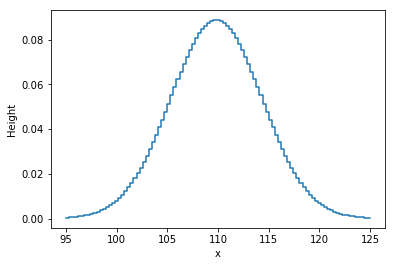

In [50]:
# SOLUTION TO CHALLENGE 1

# Define a function that returns a Gaussian.
gaus1D = lambda x, mu, sigma: (1.0 / (sigma * np.sqrt(2.0 * np.pi)))* np.exp(-(((x - mu)**2 / (2.0 * sigma**2))))

# Specify the initialization parameters for the Gaussian.
mean = 110.0
stDev = 4.5
xRange = np.linspace(mean - 15.0, mean + 15.0, 100)

# Determine the Gaussian.
gaus = gaus1D(xRange, mean, stDev)

# Plot the Gaussian.
plt.step(xRange, gaus)
plt.xlabel("x")
plt.ylabel("Height")    
plt.show()


From your plot you can see that the Gaussian is centred at the mean ($\mu$) and has a width proportional to the standard deviation ($\sigma$).

In order to be able to fit the [histogram](../../gloss.html#histogram) with a Gaussian of this form, we need to be able to extract initial estimates of $\mu$ and $\sigma$ so that sensible bounds for the optimization (fit) can be obtained.  

The centroid of the Gaussian is the position along the x-axis that corresponds to the maximum height of the peak; this is straightforward to determine.  In performing this task we will utilise the transformation of the data between [array](../../gloss.html#array) and [list](../../gloss.html#list) to exploit the different available [methods](../../gloss.html#methods) in each [class](../../gloss.html#class) that we require.

In [51]:
# Assume that the data is a Gaussian.
gaus = histo[0][:]
xRange = histo[1][:-1]

# Get the height of the Gaussian.
gausMaxVal = np.max(gaus)
    
# Get the index of the bin of the centroid.
gausMaxIdx = list(gaus).index(gausMaxVal)
    
# Get the x value at this index.
gausMaxLoc = xRange[gausMaxIdx]
    
print("The maximum height of the Gaussian is %.01f at location x = %.01f ...\n" %(gausMaxVal, gausMaxLoc))

The maximum height of the Gaussian is 389.0 at location x = 112.0 ...



### Challenges

The standard deviation is related to the full width at half maximum height (FWHM) of a Gaussian distribution by,

$FWHM = 2.35 \sigma$.

1.  Write a [function](../../gloss.html#function) called `calcGausParams` that measures the centroid and FWHM of the Gaussian you have generated.

2.  Compare the measured values with the mean and standard deviation that you specified to generate the Gaussian in the first place. 

In [52]:
# SOLUTION TO CHALLENGES 1 AND 2

import numpy as np

# Define a function that calculates the mean and standard deviation of a Gaussian.
def calcGausParams(xRange, gaus):
    
    # Get the height of the Gaussian.
    gausMaxVal = np.max(gaus)
    
    # Get the index of the bin of the centroid.
    gausMaxIdx = list(gaus).index(gausMaxVal)
    
    # Get the x value at this index.
    gausMaxLoc = xRange[gausMaxIdx]
    
    print("The maximum height of the Gaussian is %.01f at location x = %.01f ...\n" %(gausMaxVal, gausMaxLoc))
    
    # Get the width at 1/2 of the height.
    gausHalfMaxVal = 0.5 * gausMaxVal
    
    # Get a boolean list of all of the bins of the Gaussian that are >= to half the maximum height.
    bools = gaus >= gausHalfMaxVal
    
    # Now get the index of the first True in the boolean list.
    gausHalfMaxIdx = list(bools).index(True)
    
    # Get the x value at this index.
    gausHalfMaxLoc = xRange[gausHalfMaxIdx]
    
    # From this, calculate the FWHM.
    # Use twice the absolute value of half the width to account for a peak at a -ve x location.
    gausFWHM = 2.0 * abs(gausMaxLoc - gausHalfMaxLoc)
    
    print("The FWHM of the Gaussian is %.01f ...\n" %(gausFWHM))
    
    # Now calculate the standard deviation.
    stDev = gausFWHM / 2.35
    
    return gausMaxLoc, stDev, gausMaxVal
    
# Get the parameters that describe the Gaussian. 
meanCalc, stDevCalc, heightCalc = calcGausParams(xRange, gaus)

print("The calculated mean and standard deviation are %.01f and %.01f ...\n" %(meanCalc, stDevCalc))


The maximum height of the Gaussian is 389.0 at location x = 112.0 ...

The FWHM of the Gaussian is 10.0 ...

The calculated mean and standard deviation are 112.0 and 4.3 ...



We can see that the determined magnitude of $\mu$ is correct, however, the calculated value for $\sigma$ differs by 0.2 from that specified when we set up the problem (2.0 - 1.8 = 0.2).  In your own time, as an exercise, calculate the number of bins required in the xRange parameter for the uncertainty to reduce to zero.

Now we have a function that can be used to estimate the bounds for our optimization.  We will apply limits of $\pm 50\%$ to $\mu$ and $\sigma$.

The maximum height of the Gaussian is 389.0 at location x = 112.0 ...

The FWHM of the Gaussian is 10.0 ...

The maximum height of the Gaussian (fit) is 348.7 at location x = 113.0 ...

The FWHM of the Gaussian (fit) is 12.7 ...



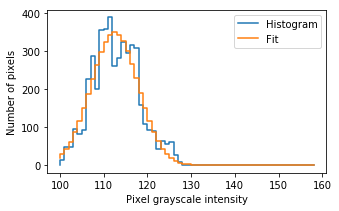

In [53]:
from scipy import optimize as so

# Define a function that performs a least squares minimisation of a Gaussian function against an input histogram distribution.
def fitGaussian(xRange, gaus):
    
    # Define the lamda function that is the basis of the fit.
    fitGaus = lambda p, x: p[2] * np.exp(-(((x - p[1])**2 / (2.0 * p[0]**2))))

    # Define the error function to be minimized.
    fitError = lambda p, x, y: np.linalg.norm(fitGaus(p, x) - y)
 
    # Get estimates of the mean and standard deviation of the distribution to fit the Gaussian to. 
    try:
        # You managed to solve the previous challenge.
        meanCalc, stDevCalc, heightCalc = calcGausParams(xRange, gaus)
    except:
        # You didn't solve the challenge.
        meanCalc = gausMaxLoc
        stDevCalc = sigma
        heightCalc = gausMaxVal
    
    # Estimate reasonable bounds for the minimisation.
    frac = 0.5
    minMeanCalc = meanCalc - abs(frac * meanCalc)
    maxMeanCalc = meanCalc + abs(frac * meanCalc)
    minStDevCalc = stDevCalc - abs(frac * stDevCalc)
    maxStDevCalc = stDevCalc + abs(frac * stDevCalc)
    minHeightCalc = heightCalc - abs(frac * heightCalc)
    maxHeightCalc = heightCalc + abs(frac * heightCalc)    

    # Append the initial guesses to the list.
    p0 = np.r_[stDevCalc,
               meanCalc,
               heightCalc]

    # Append the bounds to the list.
    bounds = [(minStDevCalc, maxStDevCalc),
              (minMeanCalc, maxMeanCalc),
              (minHeightCalc, maxHeightCalc)]
     
    p, _, _ = so.fmin_tnc(fitError, p0[:], 
                          args = (xRange, gaus),
                          approx_grad = True, 
                          bounds = bounds)
    
    return fitGaus(p, xRange), p[0], p[1], p[2]

# Pass the histogram range and distribution into the minimisation function.
xRange = histo[1][:-1]
gaus = histo[0][:]
fit, stDev, mean, height = fitGaussian(xRange, gaus)

print("The maximum height of the Gaussian (fit) is %.01f at location x = %.01f ...\n" %(height, mean))
print("The FWHM of the Gaussian (fit) is %.01f ...\n" %(stDev * 2.35))
      

# Plot the Histogram.
plt.figure( figsize=(5.0, 3.0))
plt.step(histo[1][:-1], histo[0][:], label = "Histogram")
plt.step(histo[1][:-1], fit, label = "Fit")
plt.xlabel("Pixel grayscale intensity")
plt.ylabel("Number of pixels")    
plt.legend()
plt.show()

We can see from this example that we have successfully extracted and fitted data in order to quantitatively assess the image that was acquired.  This example is trivial and the real power of this form of analysis is demonstrated when you have compicated or convovlved distributions that you have to disentangle.